<a href="https://colab.research.google.com/github/ethanrangel/football_data_analytics/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import pandas and read in CSV file and make sure to specify the first column will be our index.

In [695]:
import pandas as pd
matches = pd.read_csv('pl_stats.csv', index_col=0)


Reading the first 5 rows

In [696]:
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,...,Match Report,NaN,17.0,8.0,13.9,0.0,0,0,2024,Manchester City
3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,...,Match Report,NaN,14.0,4.0,17.9,0.0,0,0,2024,Manchester City
4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,...,Match Report,NaN,29.0,9.0,17.3,2.0,0,1,2024,Manchester City
5,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5,1,Fulham,...,Match Report,NaN,6.0,4.0,14.8,0.0,1,1,2024,Manchester City
6,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3,1,West Ham,...,Match Report,NaN,29.0,13.0,16.4,1.0,0,0,2024,Manchester City


Verfiying the rows and columns are correct. They are because there are 20 teams in leauge and 38 games played per team. If we multiple the years scraped (5) * 20 * 38 = 3800.

In [697]:
matches.shape

(3800, 27)

Here we are looking at value counts for each team to see how many matches we scraped for each team. There always 3 teams that get relegated and promoted every season so that is why some teams will have less data. However, the data seems 100% accurate from my personal findings of the teams having less games being in the championshsip and obviously the big giant teams like man city, liverpool, chealsea, having their full 190 matches.

In [698]:
matches['team'].value_counts()

team
Manchester City             190
Manchester United           190
Everton                     190
Arsenal                     190
Brighton and Hove Albion    190
Crystal Palace              190
West Ham United             190
Wolverhampton Wanderers     190
Newcastle United            190
Tottenham Hotspur           190
Aston Villa                 190
Liverpool                   190
Chelsea                     190
Burnley                     152
Leicester City              152
Southampton                 152
Bournemouth                 114
Fulham                      114
Brentford                   114
Sheffield United            114
Leeds United                114
Norwich City                 76
Nottingham Forest            76
Watford                      76
Luton Town                   38
West Bromwich Albion         38
Name: count, dtype: int64

Here we verify how many games we have per match week and it loops prefect with 100 games per week.

In [699]:
matches["round"].value_counts()

round
Matchweek 1     100
Matchweek 30    100
Matchweek 23    100
Matchweek 24    100
Matchweek 25    100
Matchweek 18    100
Matchweek 26    100
Matchweek 27    100
Matchweek 28    100
Matchweek 31    100
Matchweek 2     100
Matchweek 32    100
Matchweek 33    100
Matchweek 29    100
Matchweek 35    100
Matchweek 36    100
Matchweek 37    100
Matchweek 34    100
Matchweek 22    100
Matchweek 21    100
Matchweek 20    100
Matchweek 19    100
Matchweek 3     100
Matchweek 4     100
Matchweek 5     100
Matchweek 6     100
Matchweek 7     100
Matchweek 8     100
Matchweek 9     100
Matchweek 10    100
Matchweek 11    100
Matchweek 12    100
Matchweek 13    100
Matchweek 14    100
Matchweek 15    100
Matchweek 16    100
Matchweek 17    100
Matchweek 38    100
Name: count, dtype: int64

Now we will have to clean our data. We use "dtypes" to look at the different data types we have. We will have change some object types in some form of numeric type in order to work with machine learning algorithims.

In [700]:
 matches.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf                int64
ga                int64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk                int64
pkatt             int64
season            int64
team             object
dtype: object

Here we will overrride the existing date column so its a datetime64 type.

In [701]:
matches["date"] = pd.to_datetime(matches["date"])

Now we will create a few predictors to create a basic ML model we can build off of.

1.   First we will make a "venue_code" column which makes the "home" and "away" from the "venue" column to just '1' and '2'. We do this by converting the strings in to categories and then those categories into numbers.
2.   Now we will do the same method but this time for the "opponent" column and create a new column called "opp_code".
3. Next will create an "hour" column because its possible some players play better at a different time. We will have to remove the the colon and minutes fromt he current time column because it is current written like this "00:00". Finally we convert hour into an integer.
4. Finally we will create a "day_code" column to have a number representing each day of the week. We do this by getting the day of week property of "date" using 'dt.dayofweek'.



In [702]:
matches["venue_code"] = matches["venue"].astype("category").cat.codes
matches["opp_code"] = matches["opponent"].astype("category").cat.codes
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")
matches["day_code"] = matches["date"].dt.dayofweek

Now we can set up a target to see whether the team won the game or not. We do this by making a column called "target" that will hold 'W' as a 1 and anything else like 'L' or 'D' will be 0.

In [703]:
matches["target"] = (matches["result"] == "W").astype("int")

Now in order to train our ML model we will have to import a model form sklearn called a RandomForest. This model can pick up non linear relationships.

1.   When we call the class and set n_estimators to '200' because it will train 200 different decision trees. You can increase this number for a more accurate prediction.
2.   We will also set the "min_sample_split" to '10' because this is a good number to not effect the accuarcy of the training data.
3. Finally "random_state" set to 1 means runnning the same algorithim will give you the same results as long as data is the same.

In [739]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, min_samples_split=2, random_state=1)

Now we will have to split our data in 80:20 ratio so that we have test set and training set. However we have to make sure the training data is the older data so its predicting future matches.

We will also create a list of the predictor columns we created eariler. Then we use ".fit" to train a random forest model with the predictors to predict our target.

In [740]:
train = matches[matches["date"] < '2024-01-01']
test = matches[matches["date"] > '2024-01-01']
predictors = ["venue_code", "opp_code", "hour", "day_code"]
rf.fit(train[predictors], train["target"])

RandomForestClassifier(n_estimators=200, random_state=1)

We can then generate predictions for the test set. using the ".predict" method.

In [741]:
preds = rf.predict(test[predictors])

We will then create diffrent meausres to see how accurate our predictons the "accuracy" import from sklearn.metrics.

In [742]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(test["target"], preds)

We got 65% accuracy so well have to improve on that.

In [743]:
acc

0.6530054644808743

Now we will try to see in what situations we more accurate than not. We will do this by creating a datafram that combines our actual values vs prediction values. We will also create a crosstab to see a twoway table to see what happend when we predicited a 0 and 1.
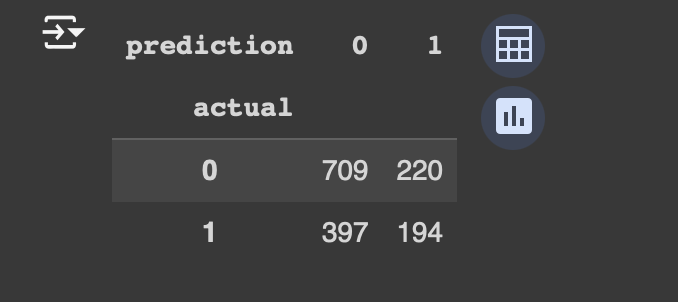

In [744]:
combined = pd.DataFrame(dict(actual=test["target"], prediction=preds))
pd.crosstab(index=combined["actual"], columns=combined["prediction"])

prediction,0,1
actual,,
0,190,39
1,88,49


Now we want to see our precison is which is 55% which we can improve.

In [745]:
from sklearn.metrics import precision_score
precision_score(test["target"], preds)

0.5568181818181818

Now we will create one data frame for each team. We will also want to create some rolling averages. We will use man city as our test groip

In [746]:
grouped_matches = matches.groupby("team")
group = grouped_matches.get_group("Manchester City")
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

We will then create a list of the columns we want to compute rolling averages for. Then create a new columns list that will add '_rolling' to each name. Now we will call the function for manchester city to see if it works.

In [747]:
cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]
rolling_averages(group, cols, new_cols)

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
4,2019-08-31,15:00,Premier League,Matchweek 4,Sat,Home,W,4,0,Brighton,...,5,1,3.333333,1.000000,20.333333,7.666667,15.633333,0.000000,0.333333,0.333333
5,2019-09-14,17:30,Premier League,Matchweek 5,Sat,Away,L,2,3,Norwich City,...,5,0,3.000000,1.000000,21.000000,7.000000,15.200000,0.333333,0.000000,0.000000
7,2019-09-21,15:00,Premier League,Matchweek 6,Sat,Home,W,8,0,Watford,...,5,1,3.000000,1.333333,19.333333,6.333333,15.100000,0.333333,0.000000,0.000000
9,2019-09-28,17:30,Premier League,Matchweek 7,Sat,Away,W,3,1,Everton,...,5,1,4.666667,1.000000,22.333333,8.000000,15.133333,1.000000,0.333333,0.333333
11,2019-10-06,14:00,Premier League,Matchweek 8,Sun,Home,L,0,2,Wolves,...,6,0,4.333333,1.333333,23.666667,8.666667,14.900000,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,2024-04-28,16:30,Premier League,Matchweek 35,Sun,Away,W,2,0,Nott'ham Forest,...,6,1,4.333333,1.000000,22.666667,8.666667,16.666667,0.333333,0.333333,0.333333
52,2024-05-04,17:30,Premier League,Matchweek 36,Sat,Home,W,5,1,Wolves,...,5,1,3.666667,0.333333,20.333333,7.666667,17.533333,0.666667,0.333333,0.333333
53,2024-05-11,12:30,Premier League,Matchweek 37,Sat,Away,W,4,0,Fulham,...,5,1,3.666667,0.333333,14.333333,7.000000,17.000000,0.666667,0.666667,0.666667
54,2024-05-14,20:00,Premier League,Matchweek 34,Tue,Away,W,2,0,Tottenham,...,1,1,3.666667,0.333333,14.666667,7.666667,17.200000,0.333333,1.000000,1.000000


Now will apply the function to each team.

In [752]:
macthes_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))

We now notice that there an extra index level so we will have drop it.

In [753]:
macthes_rolling = macthes_rolling.droplevel('team')

We will now assign values to indices because many of them repeat from tables we scraped.

In [754]:
macthes_rolling.index = range(macthes_rolling.shape[0])

Now we make a function using our previous code to make it easier to use.

In [755]:
def make_predictions(data, predictors):
    train = data[data["date"] < "2024-01-01"]
    test = data[data["date"] > "2024-01-01"]
    rf.fit(train[predictors], train["target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], prediction=preds), index=test.index)
    precision = precision_score(test["target"], preds)
    return combined, precision

Now we will call the function and pass in the predictors and add in our new predictors.

In [756]:
combined, precision = make_predictions(macthes_rolling, predictors + new_cols)

We will also add date, team, opponent and result to the datafram so we can get a better understanding of what is going on.
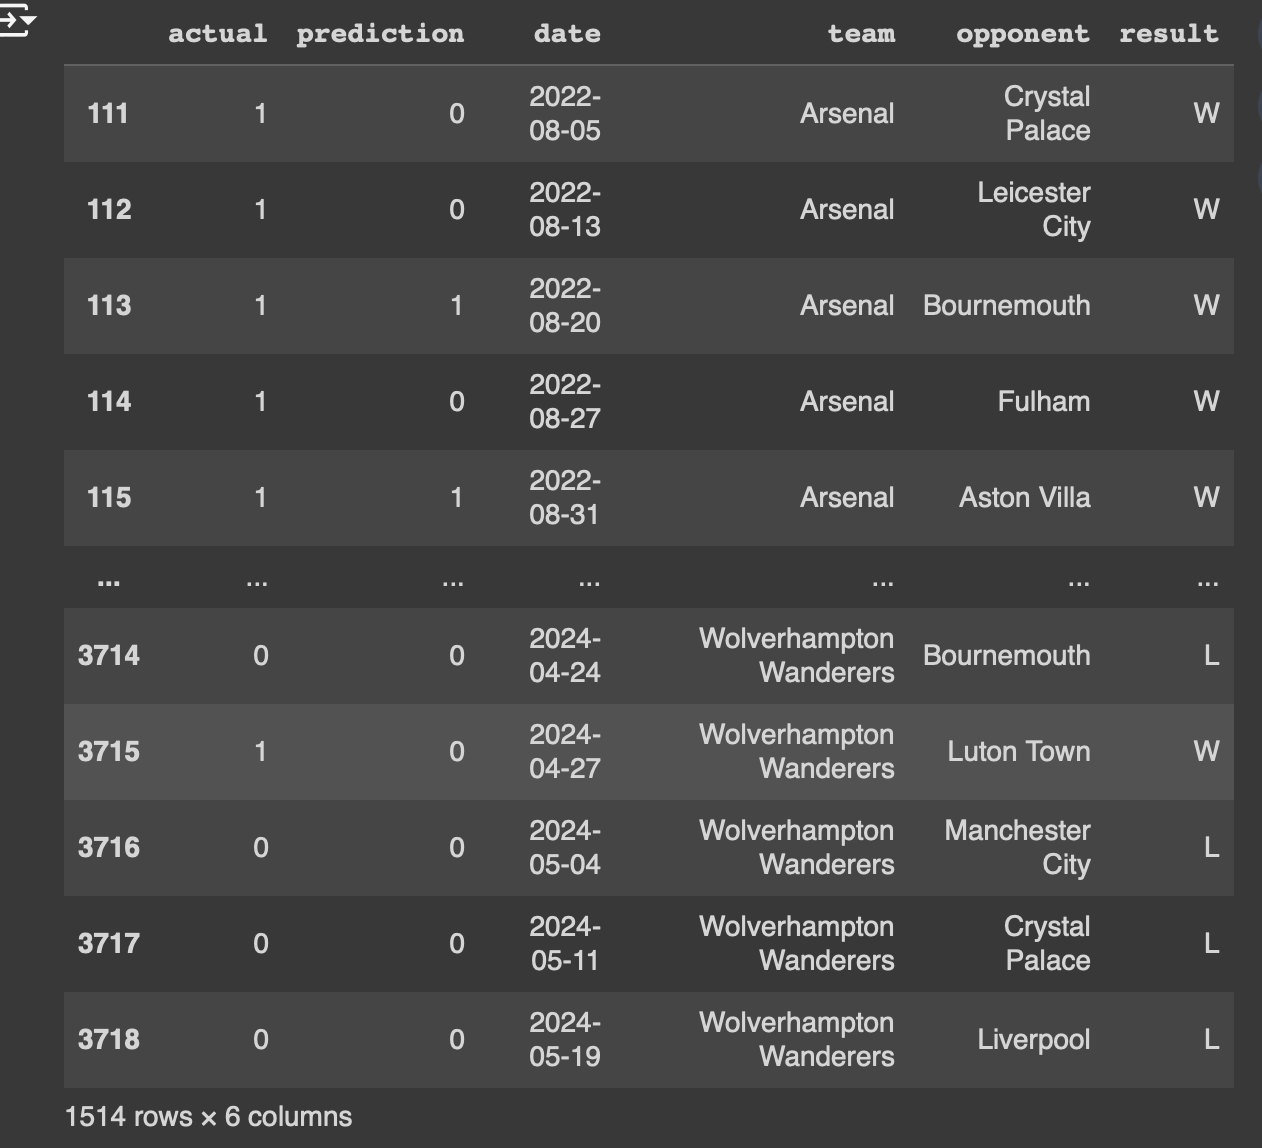

In [758]:
combined = combined.merge(macthes_rolling[["date", "team", "opponent", "result"]], left_index=True, right_index=True)

Now we want to combine and compare the result for each team againts each other because the ML model might have made different predictions on the same match. First we will have to fix some names so they match because in some cases the opponent name is a short nick name of the team name. We will do this by creating a dictonary.

In [760]:
class MissingDict(dict):
    __missing__ = lambda self, key: key
map_values = {
    "Nottingham Forest": "Nott'ham Forest",
    "West Bromwich Albion": "West Brom",
    "Tottenham Hotspur": "Tottenham",
    "Newcastle United": "Newcastle Utd",
    "Manchester United": "Manchester Utd",
    "Wolverhampton Wanderers": "Wolves",
    "Brighton and Hove Albion": "Brighton",
    "West Ham United": "West Ham",
    "Sheffield United": "Sheffield Utd"
    }
mapping = MissingDict(**map_values)

In [761]:
combined["new_team"] = combined["team"].map(mapping)

Now we will merge the datafram to itslef so we will be able to use it.

In [762]:
merged = combined.merge(combined, left_on=["date", "new_team"], right_on=["date", "opponent"])

In [763]:
merged

,actual_x,prediction_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,prediction_y,team_y,opponent_y,result_y,new_team_y
0,1,0,2024-01-20,Arsenal,Crystal Palace,W,Arsenal,0,0,Crystal Palace,Arsenal,L,Crystal Palace
1,1,1,2024-01-30,Arsenal,Nott'ham Forest,W,Arsenal,0,1,Nottingham Forest,Arsenal,L,Nott'ham Forest
2,1,0,2024-02-04,Arsenal,Liverpool,W,Arsenal,0,1,Liverpool,Arsenal,L,Liverpool
3,1,1,2024-02-11,Arsenal,West Ham,W,Arsenal,0,0,West Ham United,Arsenal,L,West Ham
4,1,1,2024-02-17,Arsenal,Burnley,W,Arsenal,0,0,Burnley,Arsenal,L,Burnley
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0,0,2024-04-24,Wolverhampton Wanderers,Bournemouth,L,Wolves,1,0,Bournemouth,Wolves,W,Bournemouth
362,1,0,2024-04-27,Wolverhampton Wanderers,Luton Town,W,Wolves,0,0,Luton Town,Wolves,L,Luton Town
363,0,0,2024-05-04,Wolverhampton Wanderers,Manchester City,L,Wolves,1,1,Manchester City,Wolves,W,Manchester City
364,0,0,2024-05-11,Wolverhampton Wanderers,Crystal Palace,L,Wolves,1,0,Crystal Palace,Wolves,W,Crystal Palace


Now we will see the rows where the ML model failed to predict correclty for the same match.

In [764]:
merged[(merged["prediction_x"] == 1) & (merged["prediction_y"] == 0)]["actual_x"].value_counts()

actual_x
1    52
0    37
Name: count, dtype: int64

So we were able to imporve our precision by 2%.

In [766]:
52/89

0.5842696629213483